In [4]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc

In [46]:
from sklearn.naive_bayes import GaussianNB as GNB #Bayes para regresion 
from sklearn.naive_bayes import MultinomialNB as MNB #Bayes con variables discretas (categoricas)
from sklearn.naive_bayes import ComplementNB as CNB
from sklearn.naive_bayes import BernoulliNB as BNB 
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [112]:
sinave_imss4=pd.read_csv('/Users/rube/Documents/ironhack/proyecto final/data_limpia/sinave_total.csv',)


In [113]:
sinave_imss4

,fecha_ingreso,cve_entidad_residencia,cve_municipio_residencia,diagnostico_clinico_neumonia,edad,esta_emabarazada,meses_embarazo,fiebre,tos,odinofagia,...,recibio_tratamiento,recibio_tratamiento_antiviral,vacunado,Masculino,Femenino,Ambulatorio,HOSPITALIZADO,tiene_covid19,negativo_covid19,urgencia
0,2020-01-02,9,2.0,0,5,0,0.0,1,1,1,...,0,1,0,0,0,1,0,0,1,1
1,2020-01-02,9,5.0,0,8,0,0.0,1,1,0,...,0,1,0,0,0,1,0,0,1,1
2,2020-01-02,9,8.0,0,3,0,0.0,1,1,1,...,1,1,0,0,0,1,0,0,1,1
3,2020-01-02,9,5.0,0,3,0,0.0,1,1,0,...,0,1,0,0,0,1,0,0,1,1
4,2020-01-02,9,5.0,1,29,0,0.0,1,1,1,...,1,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68324,2020-09-26,9,14.0,1,68,0,0.0,1,1,1,...,0,0,0,0,0,0,1,0,1,1
68325,2020-09-26,9,12.0,1,35,0,0.0,1,1,1,...,0,0,0,0,0,0,1,0,1,1
68326,2020-09-26,9,15.0,0,46,0,0.0,1,0,1,...,0,0,0,0,0,1,0,0,1,1
68327,2020-09-26,9,13.0,1,51,0,0.0,0,1,1,...,0,1,0,0,0,0,1,0,1,1


<AxesSubplot:>

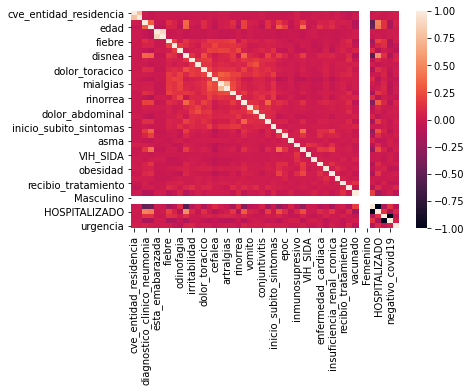

In [44]:
sns.heatmap(sinave_imss4.corr())

In [114]:
#todo
X_train, X_test, y_train, y_test=tts(sinave_imss4[['diagnostico_clinico_neumonia', 'edad', 'esta_emabarazada',
    'fiebre', 'tos', 'odinofagia', 'disnea',
       'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios', 'cefalea',
       'mialgias', 'artralgias', 'ataque_al_estado_general', 'rinorrea',
       'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis', 'cianosis',
       'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo',
       'recibio_tratamiento', 'recibio_tratamiento_antiviral', 'vacunado',
       'Masculino', 'Femenino', 'Ambulatorio', 'HOSPITALIZADO']]
                                                   , sinave_imss4['tiene_covid19'], test_size=0.2)

In [10]:
#menos columnas
X_train2, X_test2, y_train2, y_test2=tts(sinave_imss4[[ 'edad', 'esta_emabarazada',
       'meses_embarazo',
       'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma',
       'hipertension', 'VIH_SIDA', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo',
       ]]
                                                   , sinave_imss4['tiene_covid19'], test_size=0.2)

In [115]:
%%time
#regresión logistica

logit_reg = LogisticRegression()
logit_fit = logit_reg.fit(X_train,y_train)
y_pred = logit_fit.predict(X_test)

CPU times: user 1.04 s, sys: 74.7 ms, total: 1.11 s
Wall time: 616 ms


In [116]:
acc(y_test, y_pred)

0.6068344797307186

In [117]:
%%time
gnb=GNB().fit(X_train,y_train)
y_pred3= gnb.predict(X_test)

CPU times: user 73.6 ms, sys: 19.7 ms, total: 93.3 ms
Wall time: 103 ms


In [118]:
acc(y_test, y_pred3)

0.5926386653007464

In [119]:
%%time
mnb=MNB(alpha=1,fit_prior=False).fit(X_train,y_train)
y_pred4=mnb.predict(X_test)

CPU times: user 32.8 ms, sys: 16.8 ms, total: 49.6 ms
Wall time: 63.3 ms


In [120]:
acc(y_test, y_pred4)

0.575808576028099

# hyperop

In [78]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample

In [79]:
space = {'penalty':hp.choice('penanlty',['l2']),
         'tol':hp.choice('tol',[0.0001,0.000001]),
         
         'solver':hp.choice('solver',['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
         
         
    'fit_intercept':hp.choice('fit_intercept',[True,False]),
    
    'C': hp.choice('C', [0.01,0.1,1]),
    
    'max_iter':hp.choice('max_iter', [100, 1000,10000]),
         
        
}

In [80]:
from sklearn.metrics import mean_squared_error as mse

In [81]:
def objetivo(x):
    
    modelo = LogisticRegression(penalty=x['penalty'],tol=x['tol'],C = x['C'], fit_intercept=x['fit_intercept'],
            max_iter = x['max_iter'],solver=x['solver'])
    
    
    modelo.fit(X_train, y_train) #Entrenamiento es fit()
    
    y_pred=modelo.predict(X_test) #Prediccion
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss': rmse, 'status':STATUS_OK}

In [82]:
trials_reg=Trials()

In [83]:
%%time
best=fmin(fn=objetivo, space=space, algo=tpe.suggest, max_evals=10, trials=Trials())


100%|██████████| 10/10 [12:54<00:00, 77.46s/trial, best loss: 0.6274374394133485]
CPU times: user 11min 31s, sys: 6.22 s, total: 11min 37s
Wall time: 12min 54s


In [84]:
best

{'C': 0,
 'fit_intercept': 0,
 'max_iter': 2,
 'penanlty': 0,
 'solver': 3,
 'tol': 1}

In [91]:
%%time
#regresión logistica

logit_reg = LogisticRegression(fit_intercept=True, max_iter=10000, 
                               C=0.01,penalty='l2', tol=0.00001, solver='liblinear')
logit_fit = logit_reg.fit(X_train,y_train)
y_pred_p = logit_fit.predict(X_test)

CPU times: user 472 ms, sys: 17.9 ms, total: 490 ms
Wall time: 539 ms


In [92]:
acc(y_test, y_pred_p)

0.6050782965022684

In [131]:
import pickle


In [132]:
# Load from file
with open('coronavirus', 'rb') as file:
    modelo = pickle.load(file)
    

In [ ]:
'diagnostico_clinico_neumonia', 'edad', 'esta_emabarazada',
       'meses_embarazo', 'fiebre', 'tos', 'odinofagia', 'disnea',
       'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios', 'cefalea',
       'mialgias', 'artralgias', 'ataque_al_estado_general', 'rinorrea',
       'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis', 'cianosis',
       'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo',
       'recibio_tratamiento', 'recibio_tratamiento_antiviral', 'vacunado',
       'Masculino', 'Femenino', 'Ambulatorio', 'HOSPITALIZADO','urgencia'

In [104]:

neumonia=input('¿diagonostico neumonía?')
edad=input('edad con numeros entero')
embarazo=input('¿esta embarazada?')
meses=input('si esta embarazada inserte meses en número entero, de otra forma coloque cero')
fiebre=input('¿fiebre?')
tos=input('¿tos?')
odinofagia=input('¿dolor de garganta?')
disnea=input('¿dificultad para respirar?')
irritabilidad=input('¿irritabilidad?')
diarrea=input('¿diarrea?')
dolor_t=input('¿dolor toracico?')
calofrios= input('¿escalofrios?')
cefalea=input('¿dolor de cabeza?')
mialgia=input('¿dolor muscular?')
artralgia=input('¿dolor en articulaciones?')
ataque=input('¿se siente mal en general?')
rinorrea=input('¿escurrimiento nasal?')
polipnea=input('¿respiración acelerada?')
vomito=input('¿vómito?')
dolor_ab=input('¿dolor abdominal?')
conjuntivitis = input('¿irritación de ojos?')
cianosis=input ('¿cambio de color en piel?')
inicio_subito=input('¿sus sintomas iniciaron de manera súbita?')
diabetes=input('¿diabetes?')
epoc=input('¿enfermedad pulmonar obstructiva crónica?')
asma=input('¿asma?')
inmunosupresivo = input('¿inmunosupresivo?')
hipertension=input('¿hipertension?')
vih=input('¿Es VIH positivo?')
otra=input('¿alguna otra condición?')
enfermedad_cardiaca=input('¿enfermedad cárdiaca?')
obesidad=input('¿sobrepeso u obesidad?')
renal=input('¿padece insuficiencia renal?')
tabaquismo=input('¿fuma?')
tratamiento=input('¿recibió tratamiento para su padecimiento?')
antiviral=input('¿tomo antivirales?')
vacunado=input('¿se vacuno co ntra influenza?')
masculino=input('Si se considera masculino escriba si,si es femenino escriba no y responda si la siguiente pregunta')
femenino=input('Si se considera femenino escriba si')
ambulatorio=input('¿tratamiento ambulatorio?')
hospitalizado=input('¿requirió hospitalización?')
urgencia=input('¿fue servicio de urgencia?')



¿diagonostico neumonía?no
edad con numeros entero30
¿esta embarazada?no
si esta embarazada inserte meses en número entero, de otra forma coloque cero0
¿fiebre?no
¿tos?no
¿dolor de garganta?si
¿dificultad para respirar?no
¿irritabilidad?si
¿diarrea?no
¿dolor toracico?no
¿escalofrios?si
¿dolor de cabeza?no
¿dolor muscular?si
¿dolor en articulaciones?no
¿se siente mal en general?si
¿escurrimiento nasal?no
¿respiración acelerada?no
¿vómito?no
¿dolor abdominal?si
¿irritación de ojos?no
¿cambio de color en piel?no
¿sus sintomas iniciaron de manera súbita?si
¿diabetes?no
¿enfermedad pulmonar obstructiva crónica?no
¿asma?si
¿inmunosupresivo?no
¿hipertension?no
¿Es VIH positivo?si
¿alguna otra condición?no
¿enfermedad cárdiaca?no
¿sobrepeso u obesidad?si
¿padece insuficiencia renal?no
¿fuma?no
¿recibió tratamiento para su padecimiento?no
¿tomo antivirales?no
¿se vacuno co ntra influenza?si
Si se considera masculino escriba si,si es femenino colo que no y responda si la siguiente preguntasi
Si s

In [148]:
array=np.array([
        neumonia,edad,embarazo,meses,fiebre,tos,odinofagia,disnea,irritabilidad,diarrea,dolor_t,calofrios,
    cefalea,mialgia,artralgia,ataque,rinorrea,polipnea,vomito,dolor_ab,conjuntivitis,cianosis,inicio_subito,
    diabetes,epoc,asma,inmunosupresivo,hipertension,vih,otra,enfermedad_cardiaca,obesidad,renal,
    tabaquismo,tratamiento,antiviral,vacunado,masculino,femenino,ambulatorio,hospitalizado,urgencia])

In [152]:
lista=[]
for i in array:
    if i.isnumeric()==True:
        lista.append(int(i))
        
    else:
        x=i.lower()
        if x=='si':
            y=x.replace('si','1')
        if x=='no':
            y=x.replace('no','0')
        
        lista.append(int(y))
    

30
0


In [154]:
coronavirus=modelo.predict(np.array([lista]))

In [155]:
if coronavirus[0]==0:
    print('Usted no tiene coronavirus')
    
else:
    print('Puede que usted tenga coronavirus, cuidese mucho y quedese en casa')
    

Usted no tiene coronavirus
